# <b><i> Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
sns.set_context('notebook')
sns.set_palette('deep')
sns.set_color_codes()
pd.set_option('display.max_columns', None)

# <b><i> Import MNIST data

In [2]:
(train_images, train_label), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# <b><i> Plot Random Images

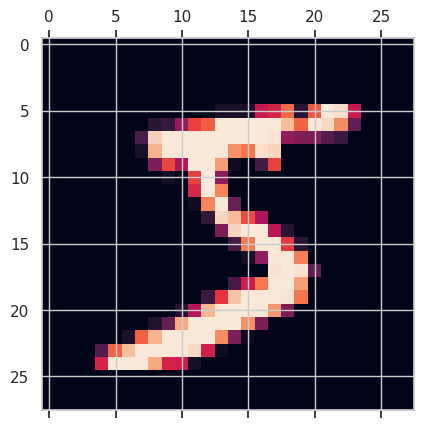

In [3]:
plt.matshow(train_images[0])

In [4]:
train_label[0]

5

In [5]:
len(train_images)

60000

# <b><i> Preprocessing

In [6]:
train_images_flatten = train_images.reshape(len(train_images), 28*28)
test_images_flatten = test_images.reshape(len(test_images), 28*28)

In [7]:
train_images_flatten.shape, test_images.shape

((60000, 784), (10000, 28, 28))

In [8]:
train_images_scaled = train_images_flatten / 255.0
test_images_scaled = test_images_flatten / 255.0

In [9]:
train_label_categorical = tf.keras.utils.to_categorical(train_label)
test_label_categorical = tf.keras.utils.to_categorical(test_labels)

# <b><i> Testing and Validation Data

In [10]:
train_images_scaled_val = train_images_scaled[:10000]
train_images_partial = train_images_scaled[10000:]

train_label_categorical_val = train_label_categorical[:10000]
train_label_categorical_partial = train_label_categorical[10000:]

# <b><i> Sequential Model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28*28,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# <b><i> Compile Model

In [12]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# <b><i> Fit Model

In [13]:
history = model.fit(
    train_images_partial,
    train_label_categorical_partial,
    epochs = 10,
    batch_size = 128,
    validation_data = (train_images_scaled_val, train_label_categorical_val)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8432 - loss: 0.5912 - val_accuracy: 0.9380 - val_loss: 0.2174
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9455 - loss: 0.1899 - val_accuracy: 0.9566 - val_loss: 0.1524
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9623 - loss: 0.1331 - val_accuracy: 0.9593 - val_loss: 0.1385
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9716 - loss: 0.0980 - val_accuracy: 0.9663 - val_loss: 0.1129
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9768 - loss: 0.0790 - val_accuracy: 0.9687 - val_loss: 0.1026
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9823 - loss: 0.0617 - val_accuracy: 0.9729 - val_loss: 0.0890
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9857 - loss: 0.0509 - val_accuracy: 0.9725 - val_loss: 0.0897
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9878 - loss: 0.0456 - val_accuracy:

# <b><i> Evaluate Model

In [14]:
evaluation = model.evaluate(test_images_scaled, test_label_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9699 - loss: 0.1000


# <b><i> Testing Loss and Accuracy

In [15]:
print(f'Test Loss:{evaluation[0]}, Test Accuracy: {np.round(evaluation[1], 2)*100}%')

Test Loss:0.08104795962572098, Test Accuracy: 98.0%


# <b><i> Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


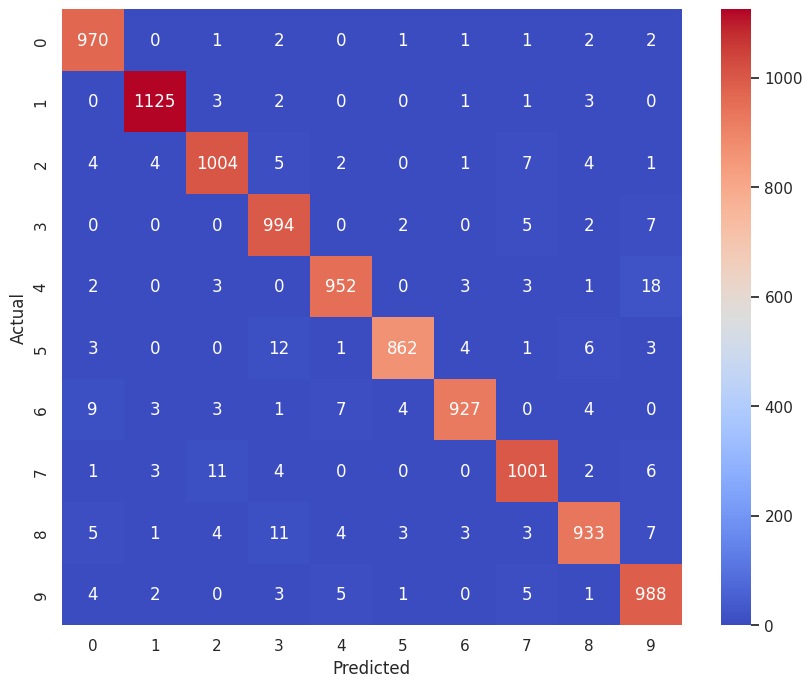

In [16]:
cm = tf.math.confusion_matrix(test_labels, np.argmax(model.predict(test_images_scaled), axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# <b><i> Classification Report

In [17]:
print(classification_report(test_labels, np.argmax(model.predict(test_images_scaled), axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# <b><i><center> Iris Flower Classification

# <b><i> Load Data

In [18]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Species'])
data = pd.concat([X, y], axis=1)

In [19]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
data['Species'].unique()

array([0, 1, 2])

In [21]:
data['Species'].value_counts()

,count
Species,
0,50
1,50
2,50


In [22]:
data.shape

(150, 5)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# <b><i> Data Preprocessing

In [24]:
data['Species_name'] = data['Species'].map({
    0: "setosa",
    1: "versicolor",
    2:"virginica"
})

In [25]:
X = data.drop(['Species_name', 'Species'], axis=1)
y = data['Species']

# <b><i> Training & Testing Data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=42, stratify=y)

# <b><i> Normalization

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# <b><i> Define Model

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# <b><i> Compile Model

In [30]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# <b><i> Fit Model

In [31]:
model.fit(X_train, y_train_encoded, epochs=50, batch_size=4)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4942 - loss: 1.0481
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6559 - loss: 1.0016 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6313 - loss: 0.9607 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6059 - loss: 0.9319 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6349 - loss: 0.9303 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.8388 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.8135 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.7595 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.7981 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9008 - loss: 0.7534 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.6951 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.7212 
Ep

In [32]:
evaluation = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss:{evaluation[0]}, Test Accuracy: {np.round(evaluation[1], 2)*100}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9219 - loss: 0.2624  
Test Loss:0.28681376576423645, Test Accuracy: 92.0%


# <b><i> Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


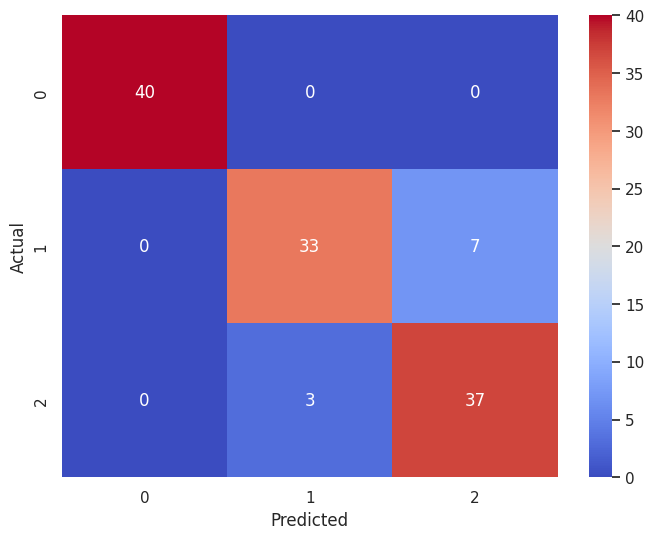

In [33]:
matrix = tf.math.confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# <b><i> Loan Approval

# <i><b> Load Data

In [34]:
data = pd.read_csv('loan_data.csv')

# <i><b> Data Analysis/Exploration

In [35]:
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [37]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [38]:
data.shape

(45000, 14)

In [39]:
data.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [40]:
data[data.duplicated()]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status


# <i><b> Exploratory Data Analysis

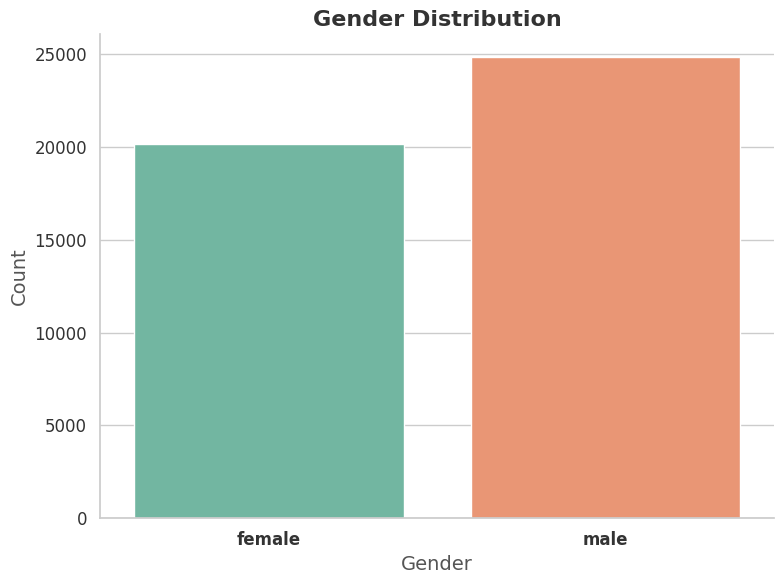

In [41]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='person_gender', data=data, palette='Set2')

plt.title('Gender Distribution', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Gender', fontsize=14, color='#555555')
plt.ylabel('Count', fontsize=14, color='#555555')

plt.xticks(color='#333333', fontsize=12, weight='bold')
plt.yticks(color='#333333', fontsize=12)

sns.despine()

plt.tight_layout()

plt.show()

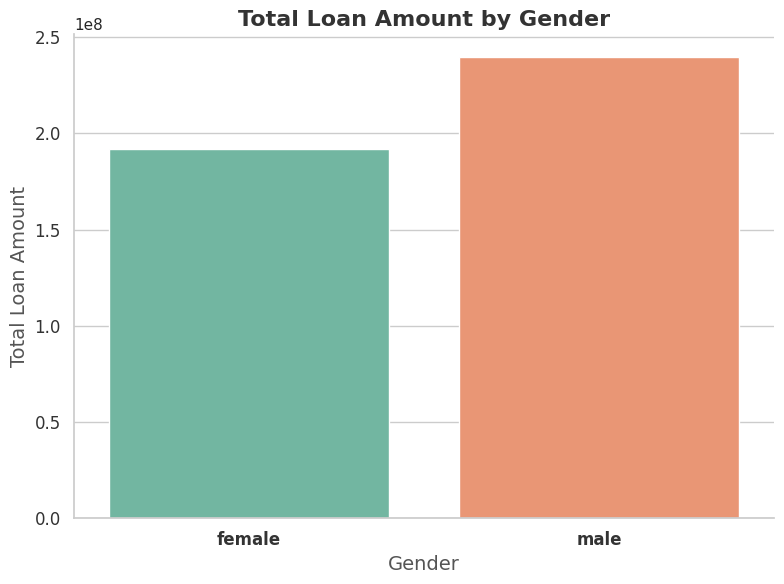

In [42]:
gender_vs_loan_amt = data.groupby('person_gender')['loan_amnt'].sum()

gender_labels = list(gender_vs_loan_amt.index)

plt.figure(figsize=(8, 6))

ax = sns.barplot(x=gender_labels, y=gender_vs_loan_amt.values, palette='Set2')

plt.title('Total Loan Amount by Gender', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Gender', fontsize=14, color='#555555')
plt.ylabel('Total Loan Amount', fontsize=14, color='#555555')

ax.set_xticks(range(len(gender_labels)))
ax.set_xticklabels(gender_labels, fontsize=12, weight='bold', color='#333333')

plt.yticks(color='#333333', fontsize=12)

sns.despine()

plt.tight_layout()

plt.show()

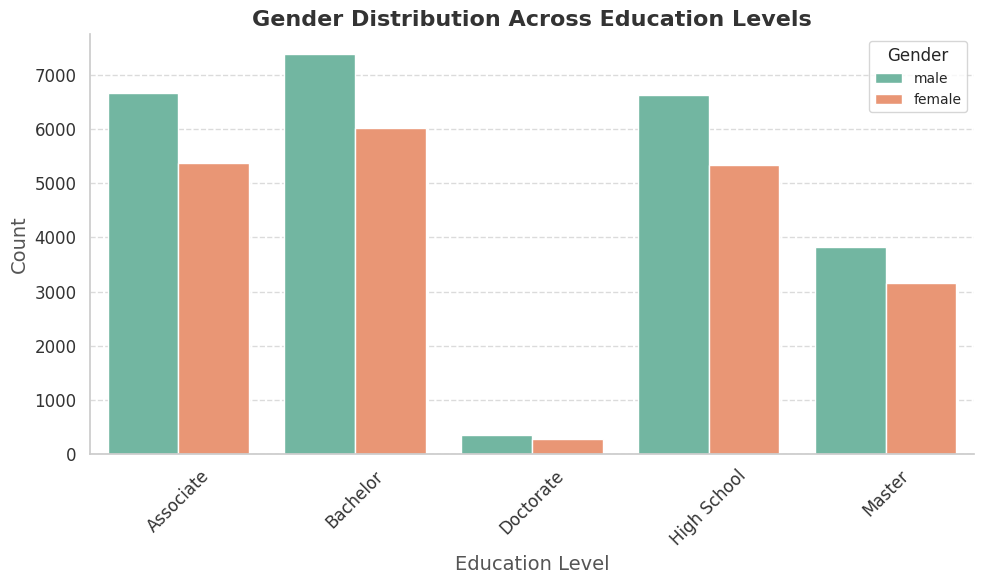

In [43]:
gender_edu = data.groupby('person_education')['person_gender'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=gender_edu,
    x='person_education',
    y='Count',
    hue='person_gender',
    palette='Set2'
)

plt.title('Gender Distribution Across Education Levels', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Education Level', fontsize=14, color='#555555')
plt.ylabel('Count', fontsize=14, color='#555555')

plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Gender', title_fontsize=12, fontsize=10)

sns.despine()

plt.tight_layout()

plt.show()

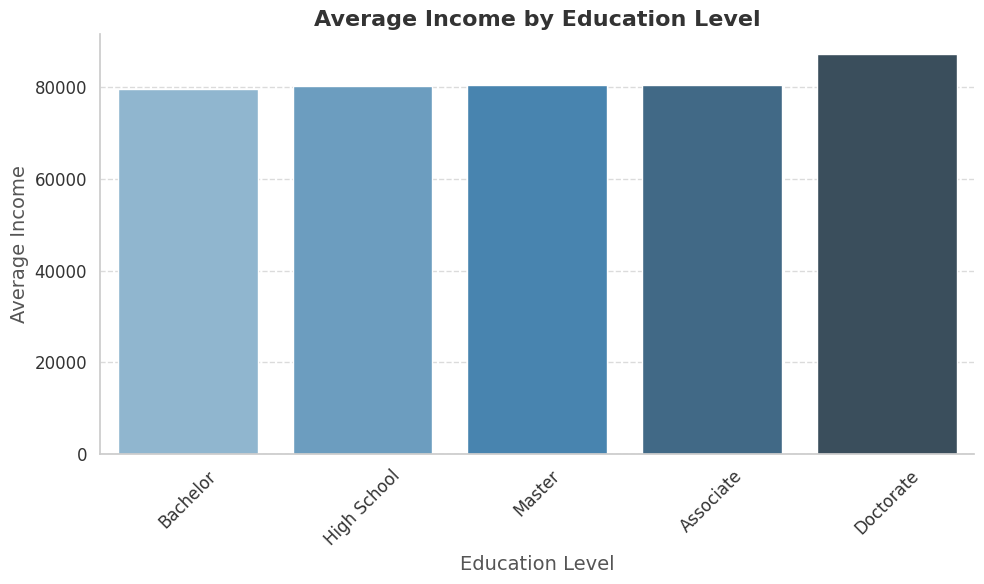

In [44]:
edu_income = data.groupby('person_education')['person_income'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=edu_income.index,
    y=edu_income.values,
    palette='Blues_d'  )

plt.title('Average Income by Education Level', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Education Level', fontsize=14, color='#555555')
plt.ylabel('Average Income', fontsize=14, color='#555555')

plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()

plt.show()

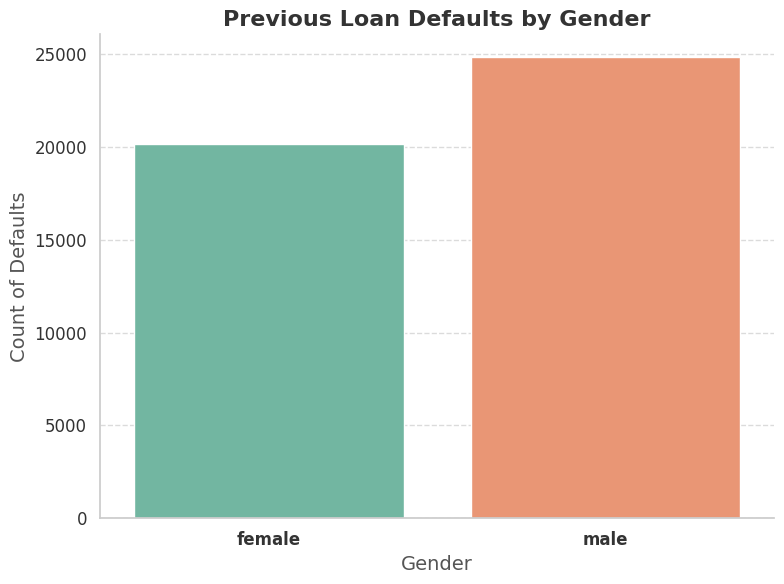

In [45]:
gender_case = data.groupby('person_gender')['previous_loan_defaults_on_file'].count().sort_values(ascending=True)

plt.figure(figsize=(8, 6))

sns.barplot(
    x=gender_case.index,
    y=gender_case.values,
    palette='Set2'  )

plt.title('Previous Loan Defaults by Gender', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Gender', fontsize=14, color='#555555')
plt.ylabel('Count of Defaults', fontsize=14, color='#555555')

plt.xticks(fontsize=12, color='#333333', weight='bold')
plt.yticks(fontsize=12, color='#333333')

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()

plt.show()

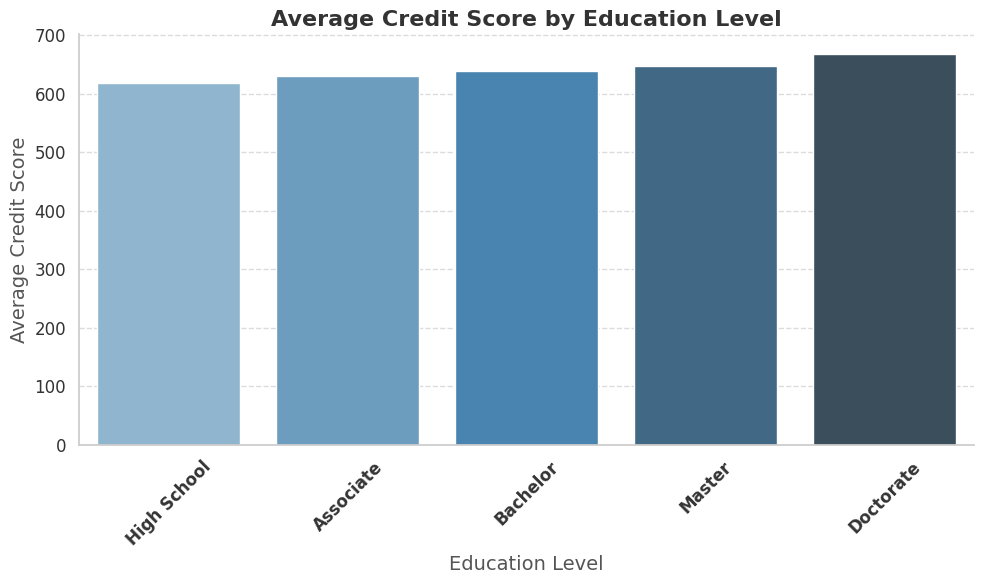

In [46]:
edu_credit = data.groupby('person_education')['credit_score'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))

sns.barplot(
    x=edu_credit.index,
    y=edu_credit.values,
    palette='Blues_d'  )

plt.title('Average Credit Score by Education Level', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Education Level', fontsize=14, color='#555555')
plt.ylabel('Average Credit Score', fontsize=14, color='#555555')

plt.xticks(rotation=45, fontsize=12, color='#333333', weight='bold')
plt.yticks(fontsize=12, color='#333333')

plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()

plt.show()

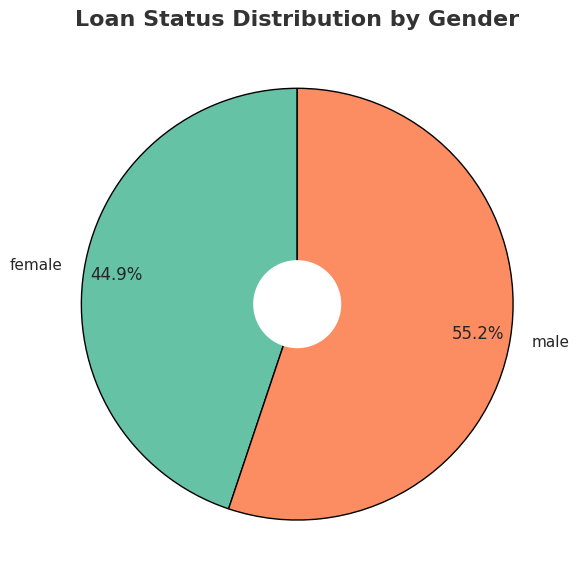

In [47]:
gender_loan_status = data.groupby('person_gender')['loan_status'].sum()

plt.figure(figsize=(8, 6))

plt.pie(
    gender_loan_status,
    labels=gender_loan_status.index,
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'), wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.20, color='white', linewidth=1.25, edgecolor='black')
plt.gca().add_artist(centre_circle)

plt.title('Loan Status Distribution by Gender', fontsize=16, weight='bold', color='#333333')

plt.tight_layout()
plt.show()

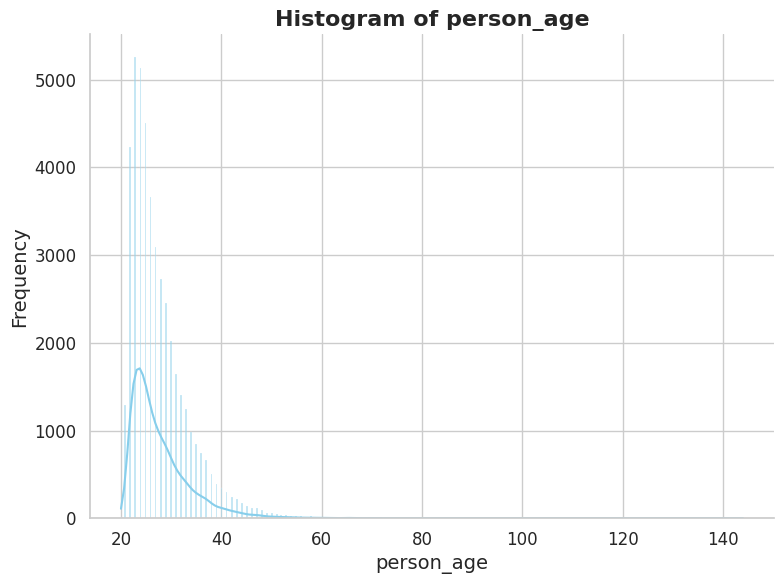

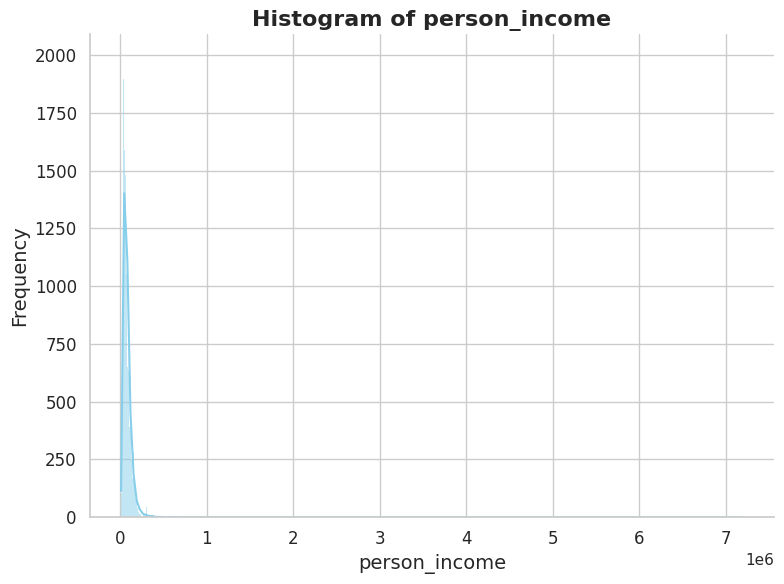

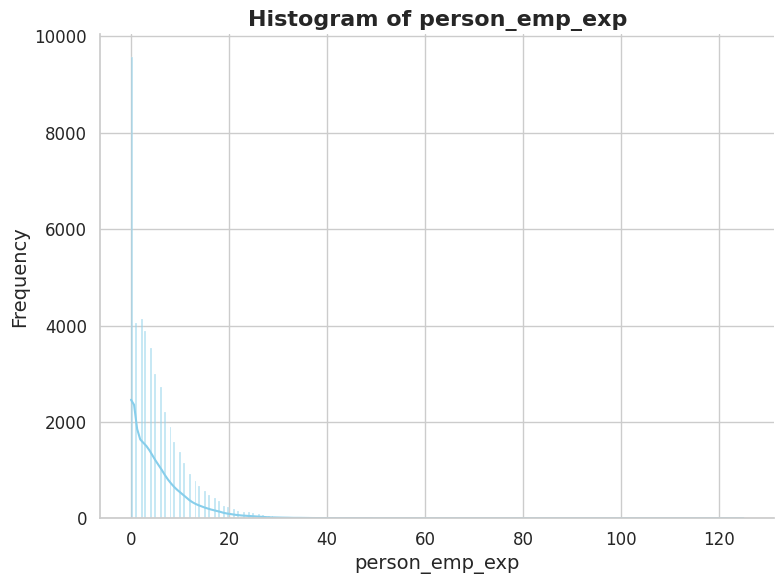

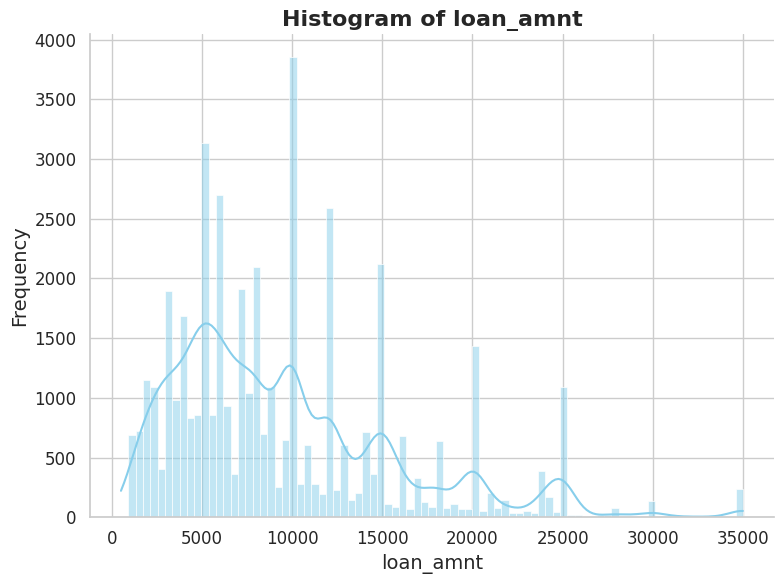

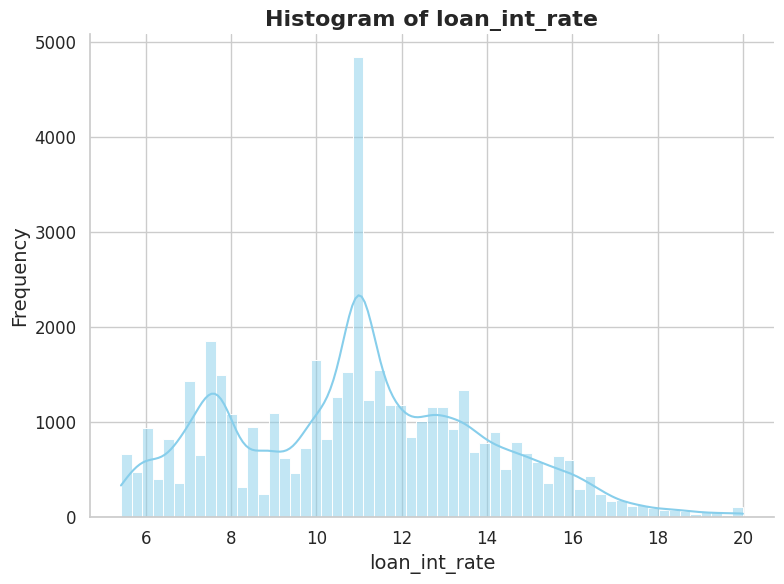

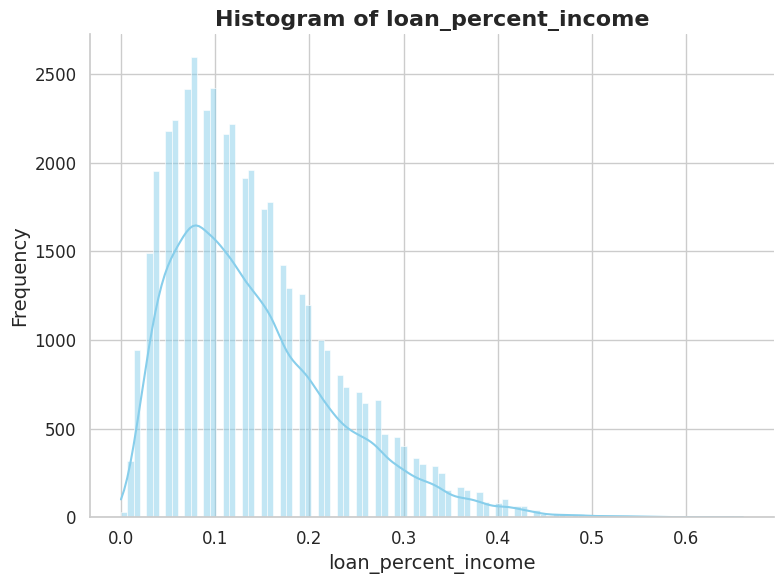

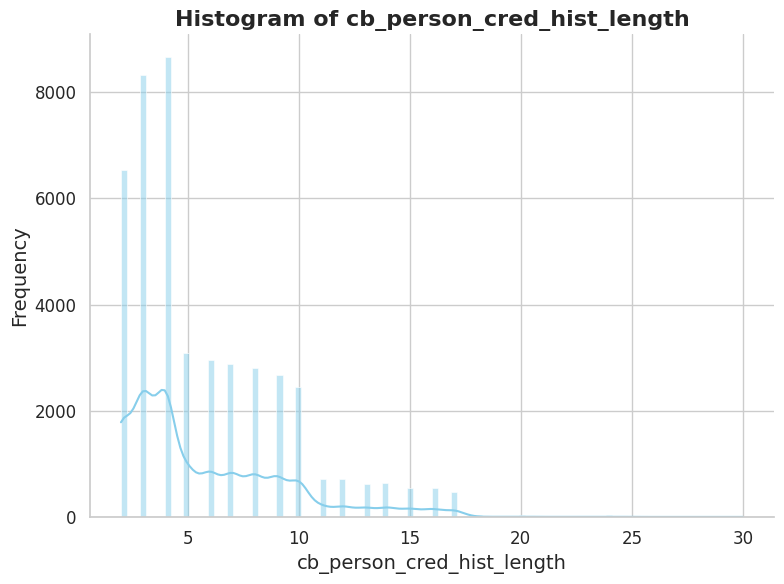

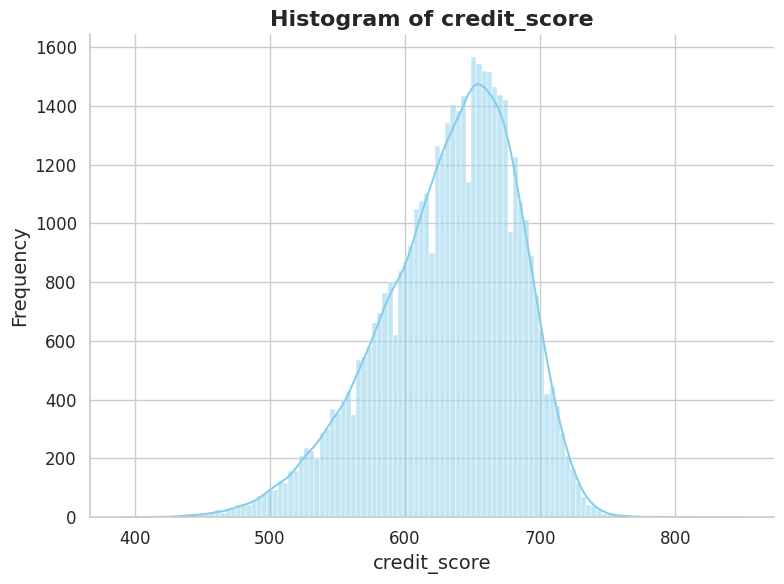

In [48]:
num_cols = data.select_dtypes(exclude='object').columns

for col in num_cols[:-1]:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, color='skyblue', kde=True)  # Adding KDE for better distribution visualization

    plt.title(f'Histogram of {col}', fontsize=16, weight='bold')  # Corrected title
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()

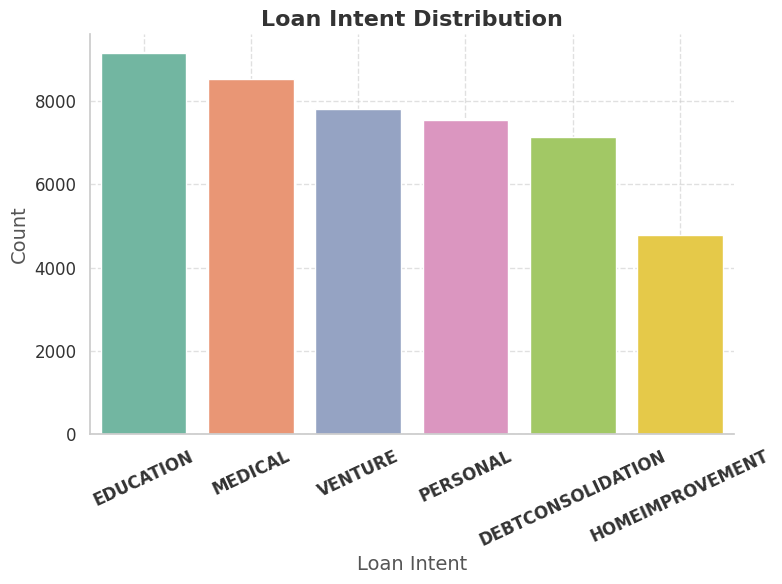

In [49]:
loan_intent_count = data['loan_intent'].value_counts()

plt.figure(figsize=(8, 6))

sns.barplot(x=loan_intent_count.index, y = loan_intent_count.values, palette='Set2')

plt.title('Loan Intent Distribution', fontsize=16, weight='bold', color='#333333')

plt.xlabel('Loan Intent', fontsize=14, color='#555555')
plt.ylabel('Count', fontsize=14, color='#555555')

plt.xticks(color='#333333', fontsize=12, weight='bold', rotation = 25)
plt.yticks(color='#333333', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

sns.despine()

plt.tight_layout()

plt.show()

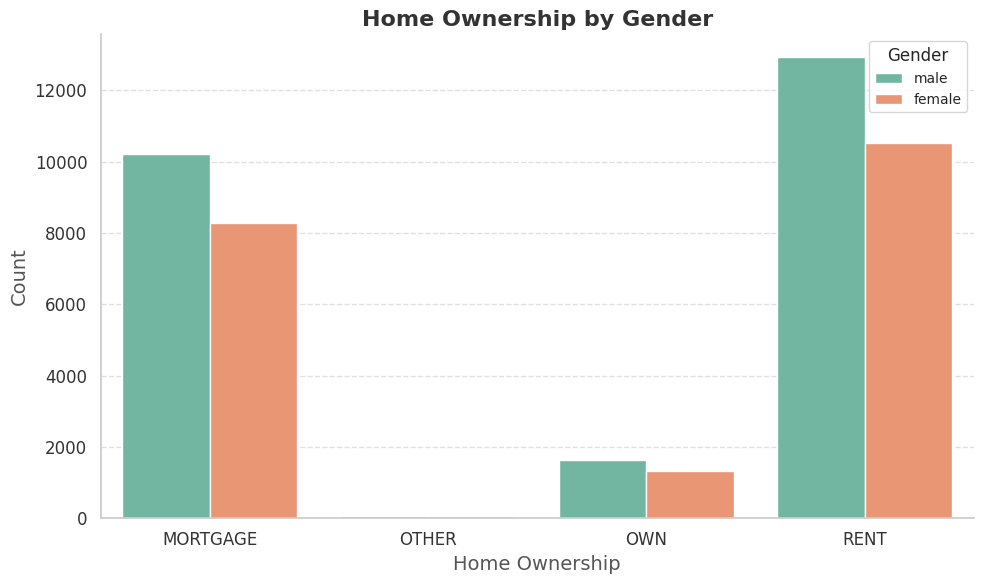

In [50]:
gender_home_stats = data.groupby('person_home_ownership')['person_gender'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=gender_home_stats,
    x='person_home_ownership',
    y='Count',
    hue='person_gender',
    palette='Set2'
)

plt.title('Home Ownership by Gender', fontsize=16, weight='bold', color='#333333')

plt.xlabel('Home Ownership', fontsize=14, color='#555555')
plt.ylabel('Count', fontsize=14, color='#555555')

plt.xticks(color='#333333', fontsize=12)
plt.yticks(color='#333333', fontsize=12)

plt.legend(title='Gender', title_fontsize=12, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)

sns.despine()

plt.tight_layout()

plt.show()

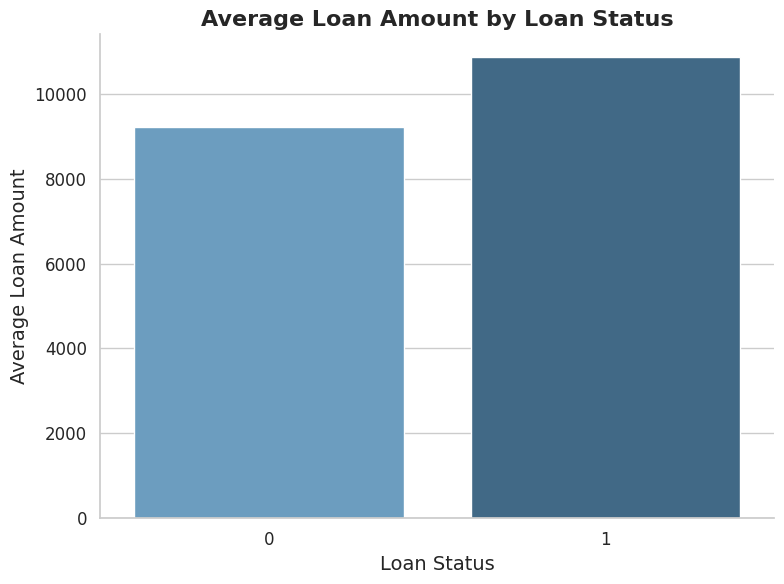

In [51]:
mean_loan_amount_per_status = data.groupby('loan_status')['loan_amnt'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_loan_amount_per_status.index, y=mean_loan_amount_per_status.values, palette='Blues_d')

plt.title('Average Loan Amount by Loan Status', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

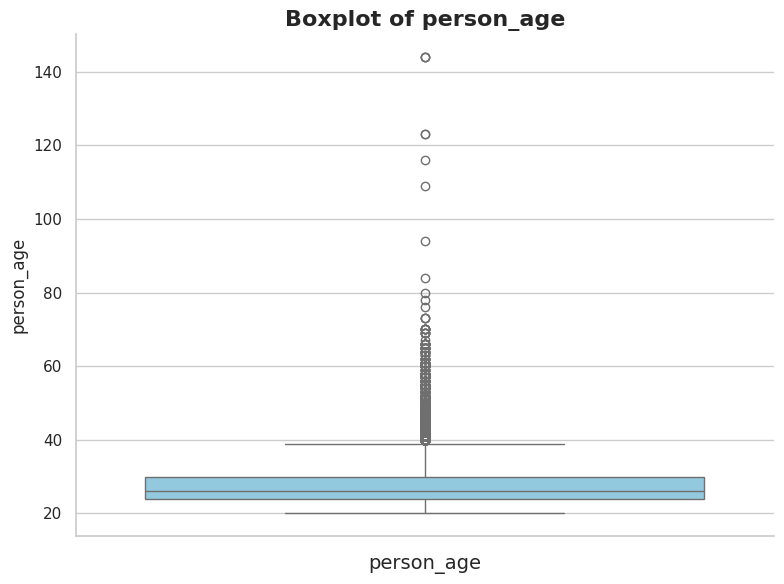

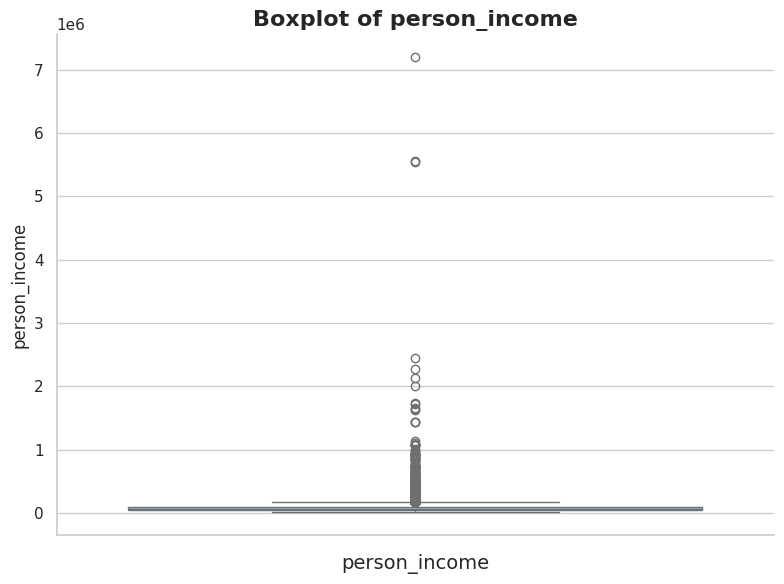

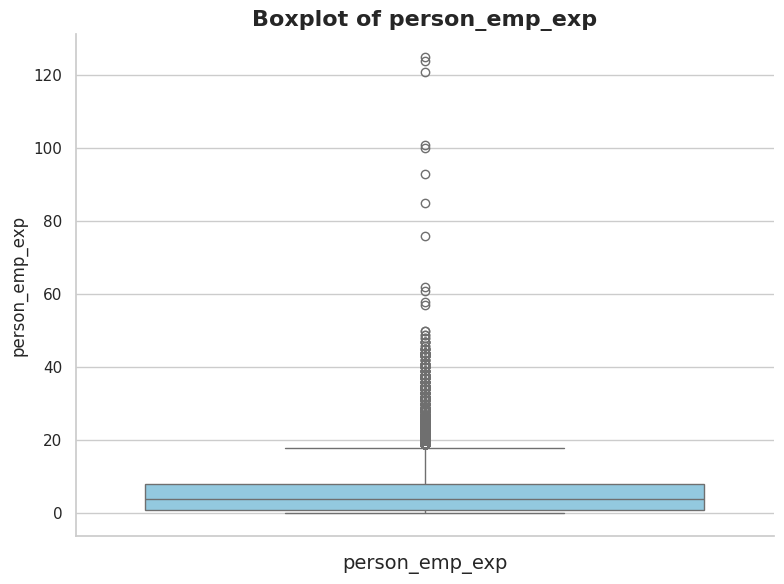

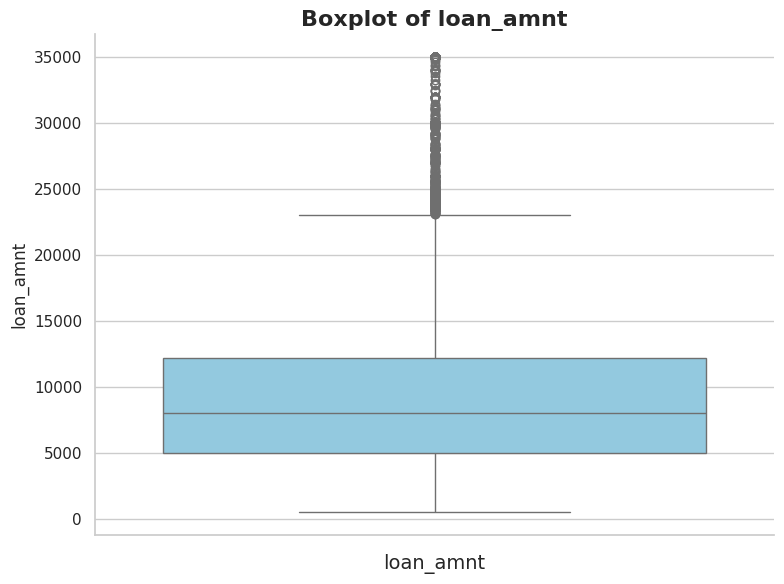

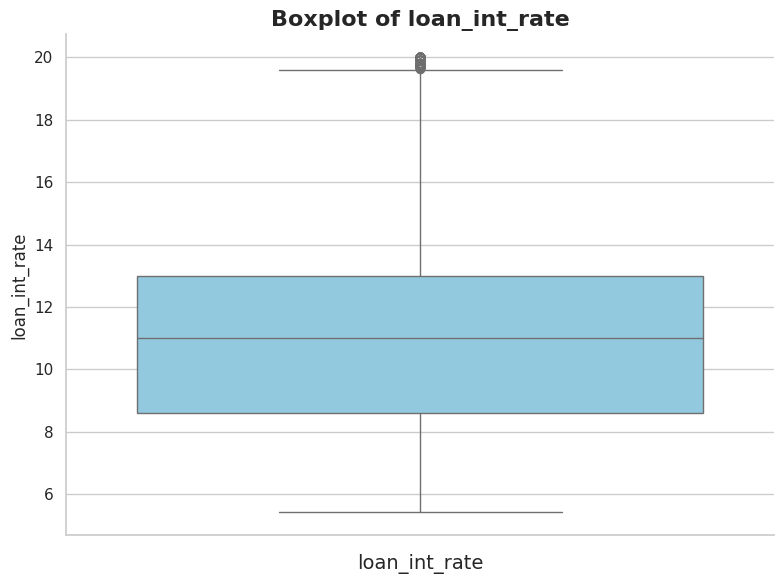

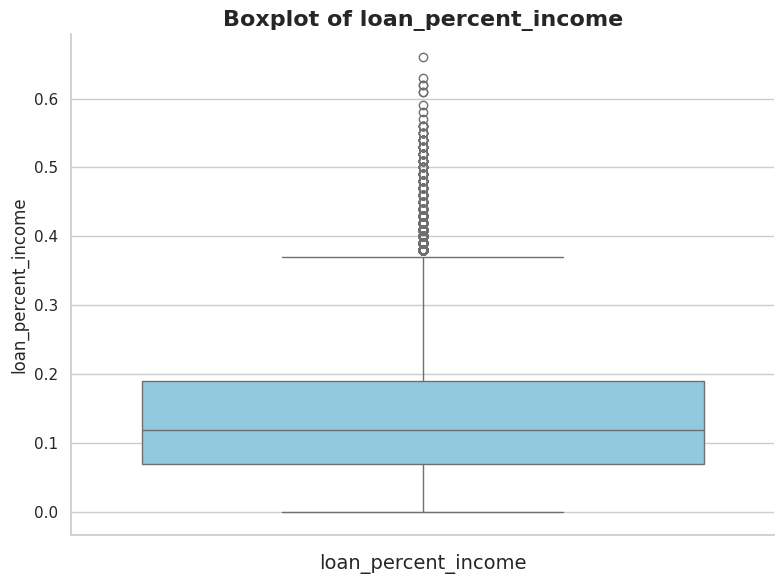

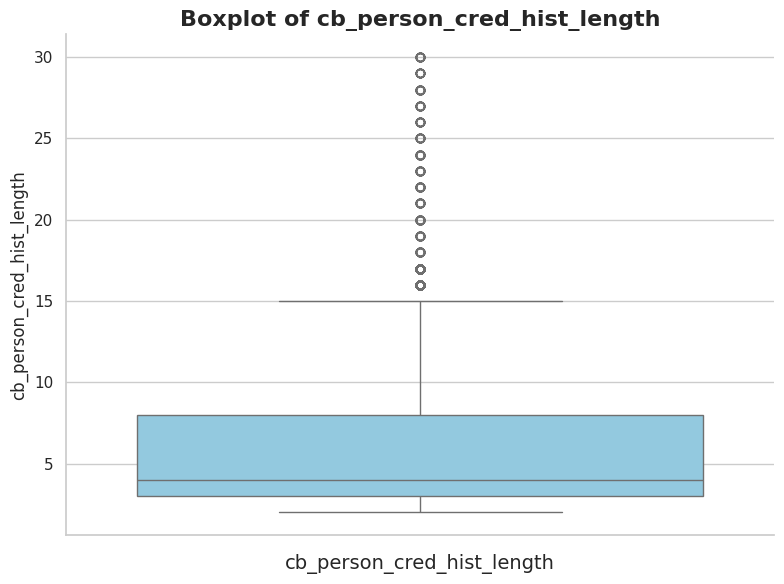

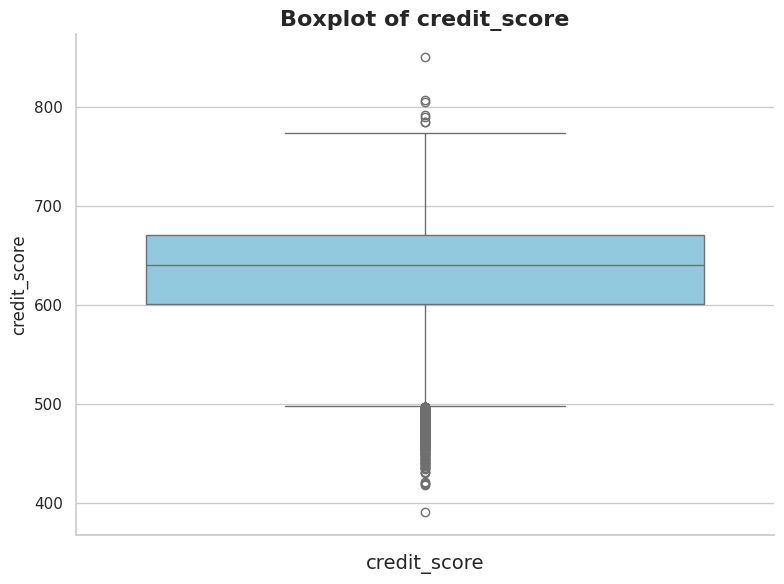

In [52]:
num_cols = data.select_dtypes(exclude='object').columns

for col in num_cols[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, y=col, color='skyblue')

    plt.title(f'Boxplot of {col}', fontsize=16, weight='bold')
    plt.xlabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()

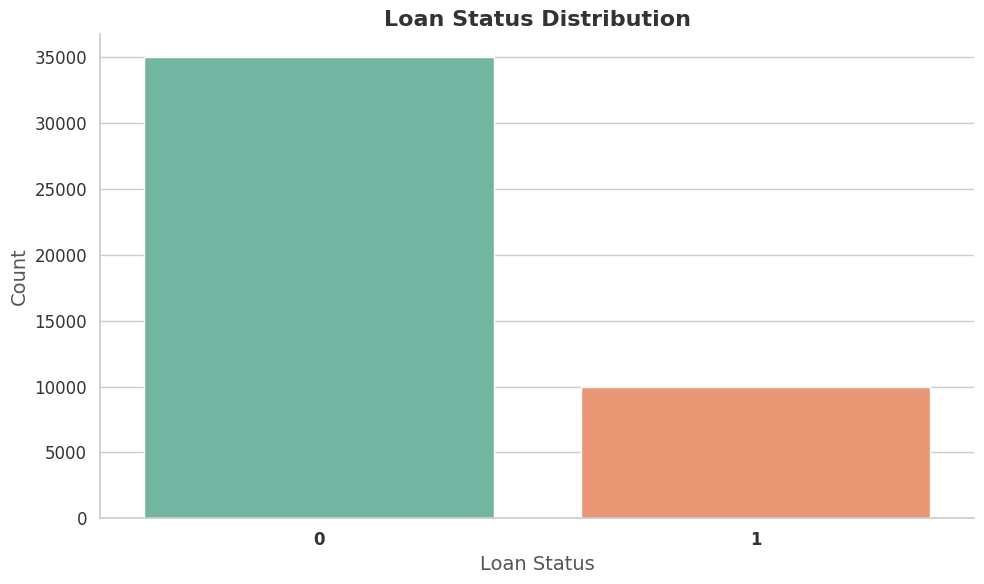

In [53]:
loan_stat = data['loan_status'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(x=loan_stat.index, y=loan_stat.values, palette='Set2')

plt.title('Loan Status Distribution', fontsize=16, weight='bold', color='#333333')
plt.xlabel('Loan Status', fontsize=14, color='#555555')
plt.ylabel('Count', fontsize=14, color='#555555')

plt.xticks(fontsize=12, weight='bold', color='#333333')
plt.yticks(fontsize=12, color='#333333')

sns.despine()

plt.tight_layout()

plt.show()

# <i><b> Data Preprocessing

In [54]:
data[data[num_cols] < 0].isna().sum()

,0
person_age,45000
person_gender,45000
person_education,45000
person_income,45000
person_emp_exp,45000
person_home_ownership,45000
loan_amnt,45000
loan_intent,45000
loan_int_rate,45000
loan_percent_income,45000


In [55]:
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({
    'Yes': 1,
    'No': 0
}).astype(int)

In [56]:
data['person_gender'] = data['person_gender'].map({
    'male': 1,
    'female': 0
}).astype(int)

In [57]:
data_1 = pd.get_dummies(data, drop_first=True).astype(float)

In [58]:
num_cols = data_1.select_dtypes(include=['float', 'int']).columns
num_cols = [col for col in num_cols if data_1[col].nunique() > 10]
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [59]:
for col in num_cols:
    data_1[col] = np.log1p(data_1[col])

# <i><b> Traget and Independent Column Splitting

In [60]:
X = data_1.drop('loan_status', axis=1)
y = data_1['loan_status']

# <i><b> Handling Class Imbalance with SMOTEENN

In [61]:
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# <i><b> Splitting Data in Training and Testing Data

In [71]:
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# <i><b> Scaling Data

In [72]:
scaler = StandardScaler()

X_train_en_scaled = X_train_en.copy()
X_test_en_scaled = X_test_en.copy()

X_train_en_scaled[num_cols] = scaler.fit_transform(X_train_en_scaled[num_cols])
X_test_en_scaled[num_cols] = scaler.transform(X_test_en_scaled[num_cols])

In [73]:
X_test_en_scaled.shape[1]

22

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_en_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [75]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [76]:
model.fit(X_train_en_scaled, y_train_en, epochs=20, batch_size=32, validation_data=(X_test_en_scaled, y_test_en))

Epoch 1/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9254 - loss: 0.1914 - val_accuracy: 0.9579 - val_loss: 0.0977
Epoch 2/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.0965 - val_accuracy: 0.9631 - val_loss: 0.0899
Epoch 3/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9612 - loss: 0.0916 - val_accuracy: 0.9641 - val_loss: 0.0879
Epoch 4/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9650 - loss: 0.0853 - val_accuracy: 0.9668 - val_loss: 0.0837
Epoch 5/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9666 - loss: 0.0844 - val_accuracy: 0.9652 - val_loss: 0.0830
Epoch 6/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9667 - loss: 0.0798 - val_accuracy: 0.9657 - val_loss: 0.0828
Epoch 7/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9678 - loss: 0.0804 - val_accuracy: 0.9690 - val_loss: 0.0779
Epoch 8/20
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.0760 - 

In [79]:
predictions = model.predict(X_test_en_scaled)
predictions = (predictions > 0.5).astype(int)

372/372 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [80]:
print(classification_report(y_test_en, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      5569
         1.0       0.96      0.99      0.98      6313

    accuracy                           0.97     11882
   macro avg       0.98      0.97      0.97     11882
weighted avg       0.97      0.97      0.97     11882



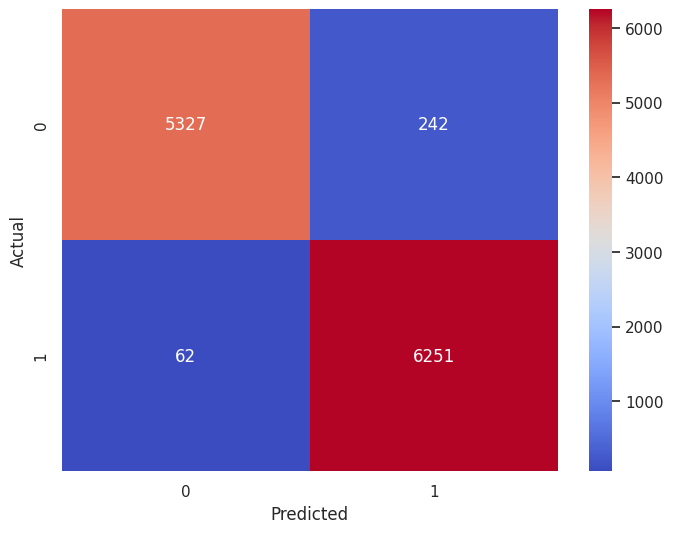

In [81]:
matrix = tf.math.confusion_matrix(y_test_en, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()